In [1]:
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np
%matplotlib inline

In [2]:
img = cv2.imread('images/test38.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,(int(gray.shape[0]/8),int(gray.shape[1]/8)))

In [3]:
def converte_formato(img, ctrlRep=None):
    if(ctrlRep == "normalizada"):
        cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
        img = cv2.convertScaleAbs(img, img)
        return img
    if (ctrlRep == "scaleabs"):
        img = cv2.convertScaleAbs(img, img)
        return img
    img = np.absolute(img)
    cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    img = cv2.convertScaleAbs(img, img)
    return img

In [4]:
def dog(img, sigma1, sigma2):
    size = int((sigma2 - 0.35) / 0.15)
    if size % 2 == 0:
        size += 1
    blur1 = cv2.GaussianBlur(img, (size, size), sigma1).astype(np.float32)
    blur2 = cv2.GaussianBlur(img, (size, size), sigma2).astype(np.float32)
    resultado = converte_formato(blur2-blur1, 'normalizada')
    return cv2.applyColorMap(resultado, cv2.COLORMAP_JET)

In [5]:
k = np.sqrt(2)
resultados = []
for n in range(5):
    sigma1 = 1.6 * k**n
    sigma2 = 1.6 * k**(n+1)
    resultados.append(dog(gray, sigma1, sigma2))

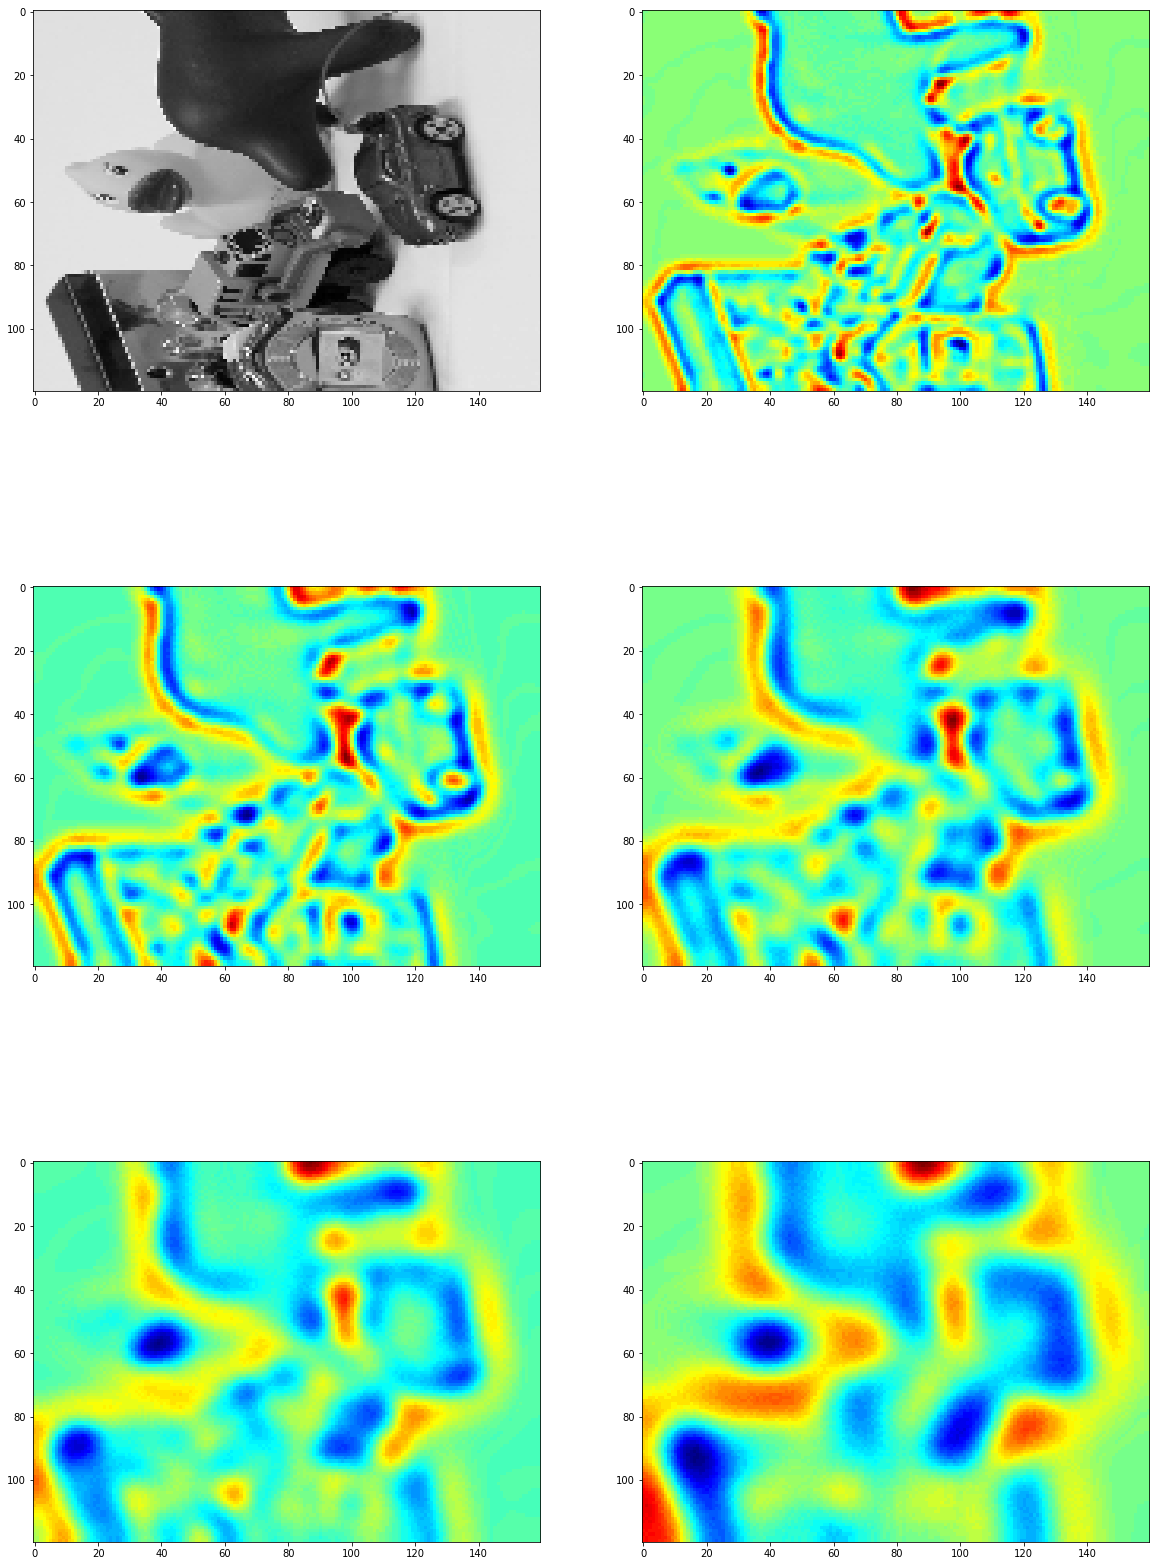

In [6]:
plt.rcParams['figure.figsize'] = [20, 30]
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(gray, cmap='gray')
axarr[0,1].imshow(resultados[0])
axarr[1,0].imshow(resultados[1])
axarr[1,1].imshow(resultados[2])
axarr[2,0].imshow(resultados[3])
axarr[2,1].imshow(resultados[4])